In [31]:
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import tkinter as tk
import tkinter.filedialog as tkdia
import byc.standard_analysis as sa
reload(sa)
import byc.fitting_tools as ft
reload(ft)
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from read_roi import read_roi_file, read_roi_zip

plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

In [7]:
by4741_young_pJC031_data = sa.get_dfs_list() # from 20191106_byc (UbL...NS)

In [8]:
dfs_list = by4741_young_pJC031_data
chase_start = 5

for df in dfs_list:
    df['construct'] = 'pJC031'
    df['tail'] = 'NS'
    df['N-end'] = 'UbL'
    df.loc[:, 'yfp_bg_sub']  = df.yfp_mean - df.yfp_mean.min()
    df.loc[:, 'dsred_bg_sub'] = df.dsred_mean - df.dsred_mean.min()
    df.loc[:, 'yfp_norm'] = df.yfp_mean / df.yfp_mean.max()
    df.loc[:, 'dsred_norm'] = df.dsred_mean / df.dsred_mean.max()

In [33]:
params_dict = ft.fit_exp(df, 5, 35)

### Scan start times for a single cell 

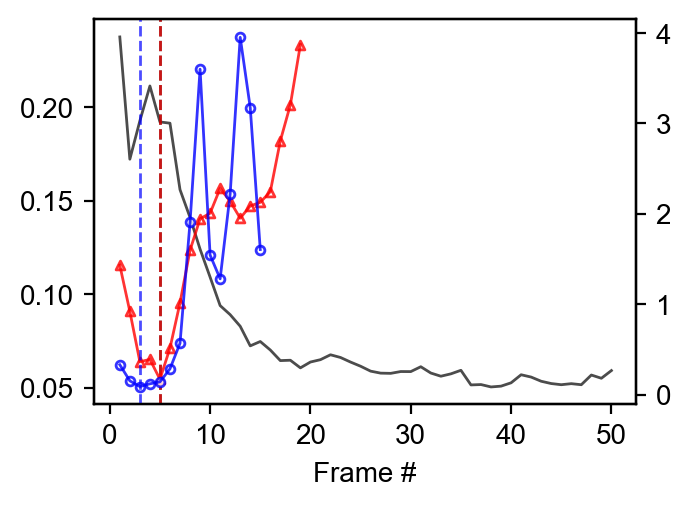

In [30]:
df = by4741_young_pJC031_data[1]
scan_fit_dict = ft.scan_start_frames(df, fit_func=ft.fit_exp)
err_df = ft.get_err_df(scan_fit_dict)
true_chase_start = 5

fig = plt.figure(figsize=(3.5, 2.5))
fig.set_dpi(200)

axvlinewidth = 1
axvlinealpha = 0.7
linewidth = 1
xlabel = ('Frame #')


# Plot trace for this individual cell
ax1 = plt.axes()
ax1.plot(df.Slice, df.yfp_bg_sub,
         color='black', alpha=0.7, linewidth=linewidth)
ax1.axes.get_yaxis().set_visible(False) # hide this 
# axis so it won't overlap below
ax1.set_xlabel(xlabel)
ax1.axvline(true_chase_start, linewidth=axvlinewidth,
            color='black', linestyle='--', alpha=axvlinealpha)

# Plot b_err (the std. deviation for that fit)
# vs. start_frame for that fit
ax2 = ax1.twinx()
ax2.scatter(err_df.start_frame, err_df.b_err,
            color='white', edgecolors='red',
            marker="^", alpha=0.8, s=10)

ax2.plot(err_df.start_frame, err_df.b_err,
            color='red', alpha=0.8, linewidth=1)

ax2.axvline(err_df.start_frame[err_df.b_err.idxmin()],
            color='red', linestyle='--', alpha=axvlinealpha,
            linewidth=axvlinewidth)

# Plot median residual vs start frame for each fit
ax3 = ax2.twinx()

ax3.scatter(err_df.start_frame[0:15], err_df.residual_ss[0:15],
            color='white', edgecolors='blue',
            marker="o", alpha=0.8, s=10)

ax3.plot(err_df.start_frame[0:15], err_df.residual_ss[0:15],
            color='blue', alpha=0.8, linewidth=linewidth)

ax3.axvline(err_df.start_frame[err_df.residual_ss.idxmin()],
            color='blue', linestyle='--', alpha=axvlinealpha,
            linewidth=axvlinewidth)
#ax3.set_ylim(0, 10)

plt.show()